In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
# Dispaly max column
pd.pandas.set_option('display.max_columns',None)
# Display max rows
#pd.pandas.set_option('display.max_rows', None)

In [2]:
## loading dataset using pandas library
telcom = pd.read_csv("telcom_clean.csv")

## print the top5 records
telcom.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.310000e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.080000e+14,3.366496e+10,3.550000e+13,9.16E+15,42.000000,5.000000,23.0,44.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,114471023.7,3242301.385,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.310000e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.080000e+14,3.368185e+10,3.580000e+13,L77566A,65.000000,5.000000,16.0,26.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,114471023.7,3242301.385,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.310000e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.080000e+14,3.376063e+10,3.530000e+13,D42335A,109.795706,17.662883,6.0,9.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,114471023.7,3242301.385,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.310000e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.080000e+14,3.375034e+10,3.540000e+13,T21824A,109.795706,17.662883,44.0,44.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,114471023.7,3242301.385,3330.0,37882.0,1.321510e+09,undefined,undefined,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.310000e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.080000e+14,3.369980e+10,3.540000e+13,D88865A,109.795706,17.662883,6.0,9.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,114471023.7,3242301.385,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
## Variable of interest
telcom_df = telcom[['MSISDN/Number', 
                    'Avg RTT DL (ms)', 
                    'Avg RTT UL (ms)', 
                    'Avg Bearer TP DL (kbps)', 
                    'Avg Bearer TP UL (kbps)',
                    'TCP DL Retrans. Vol (Bytes)', 
                    'TCP UL Retrans. Vol (Bytes)',
                    'DL TP < 50 Kbps (%)', 
                    '50 Kbps < DL TP < 250 Kbps (%)',
                    '250 Kbps < DL TP < 1 Mbps (%)', 
                    'DL TP > 1 Mbps (%)',
                    'UL TP < 10 Kbps (%)', 
                    '10 Kbps < UL TP < 50 Kbps (%)',
                    '50 Kbps < UL TP < 300 Kbps (%)', 
                    'UL TP > 300 Kbps (%)',            
                    'Handset Type']].copy()

In [4]:
telcom_df.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Handset Type
0,3.366496e+10,42.000000,5.000000,23.0,44.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A5 Sm-A520F
1,3.368185e+10,65.000000,5.000000,16.0,26.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy J5 (Sm-J530)
2,3.376063e+10,109.795706,17.662883,6.0,9.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A8 (2018)
3,3.375034e+10,109.795706,17.662883,44.0,44.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,undefined
4,3.369980e+10,109.795706,17.662883,6.0,9.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Sm-G390F


### Lets handle the missing values

In [5]:
telcom_df.isnull().sum()

MSISDN/Number                     0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
TCP DL Retrans. Vol (Bytes)       0
TCP UL Retrans. Vol (Bytes)       0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Handset Type                      0
dtype: int64

<Axes: >

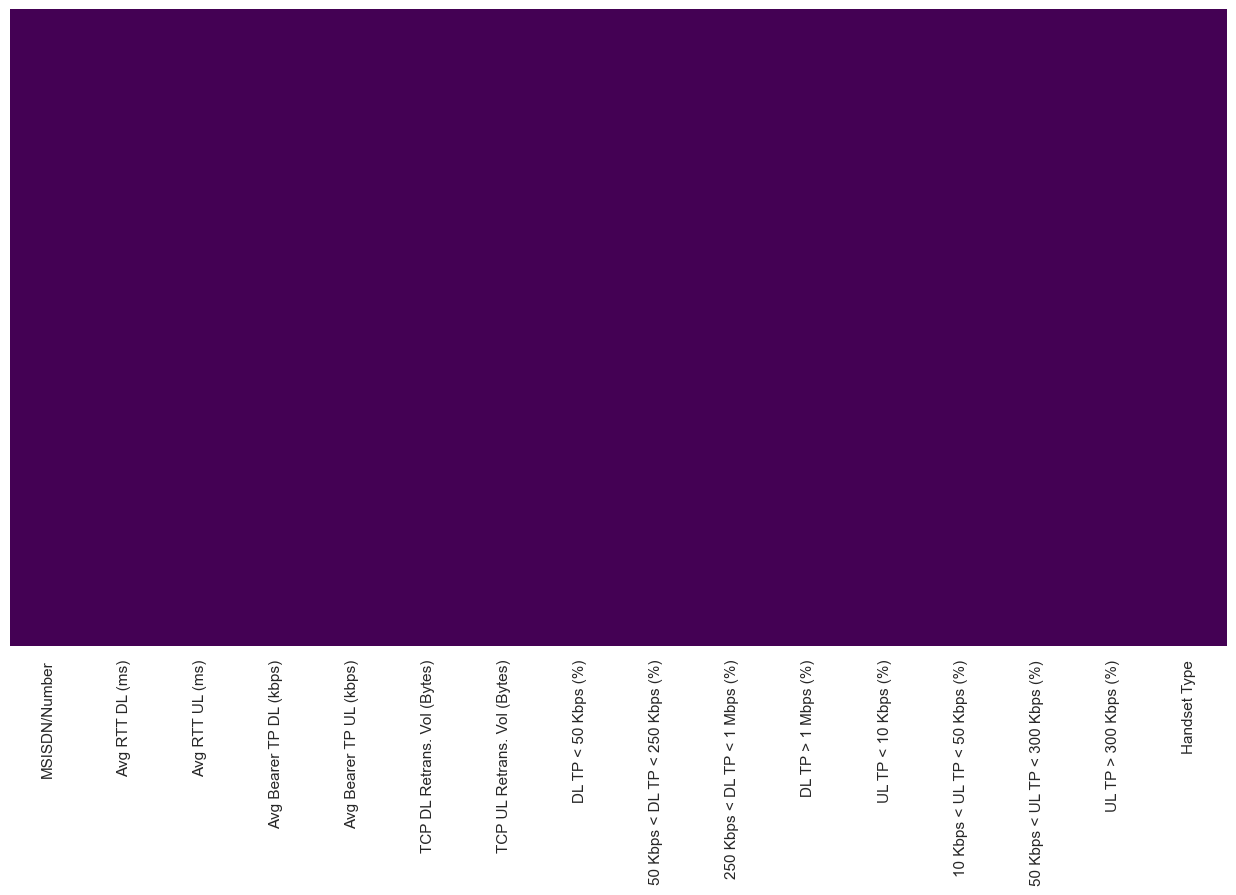

In [6]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.heatmap(telcom_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

***There are no missing values in dataset***

### Lets handle outliners

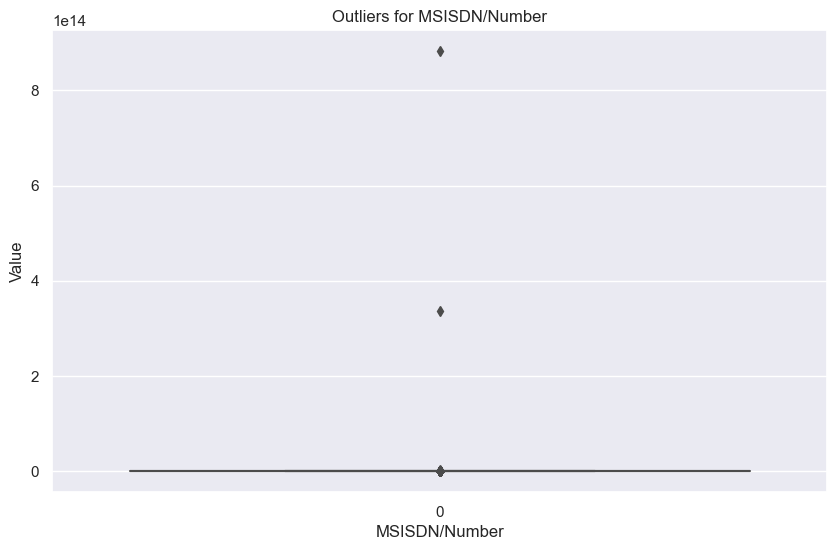

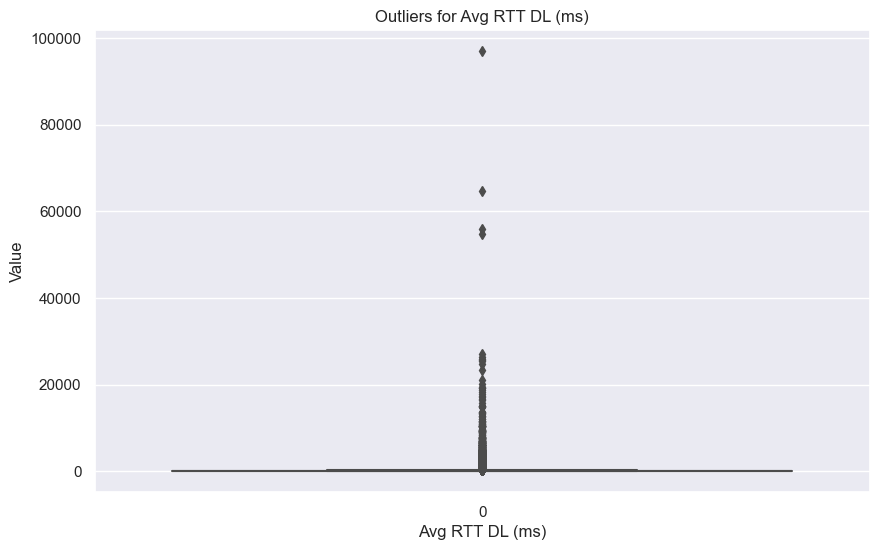

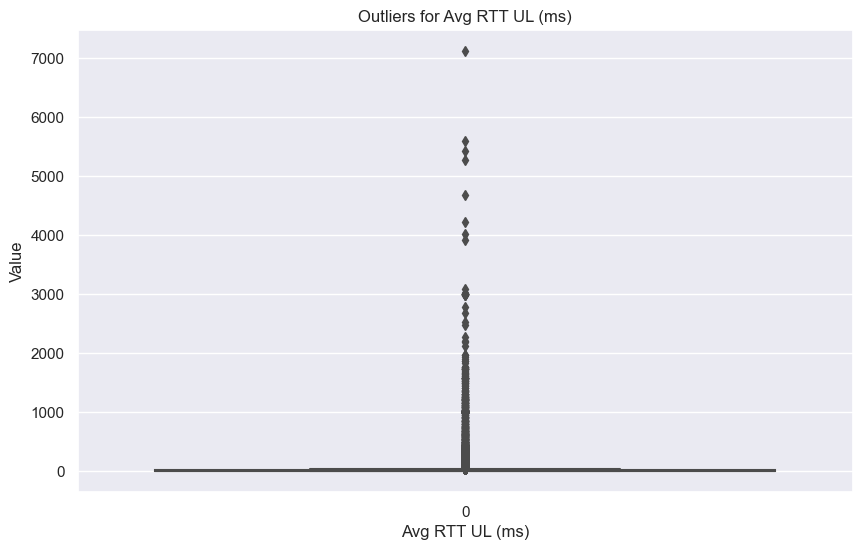

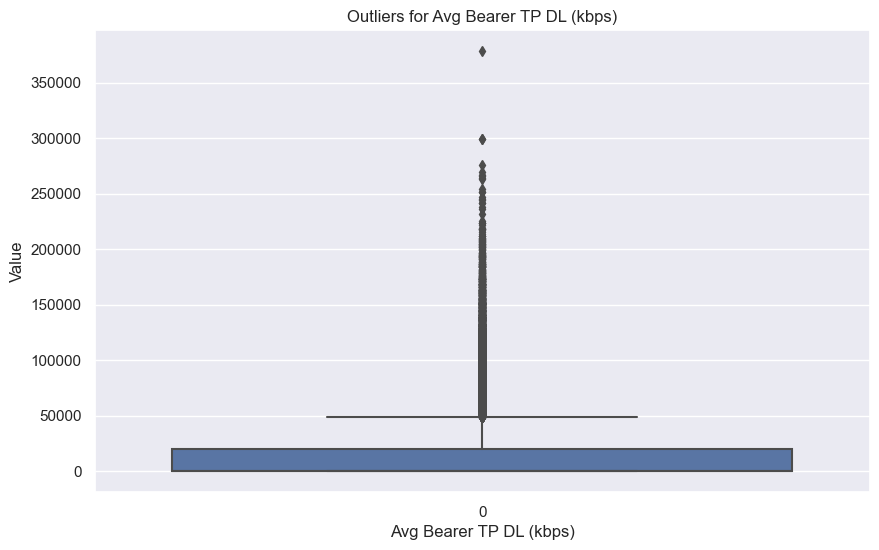

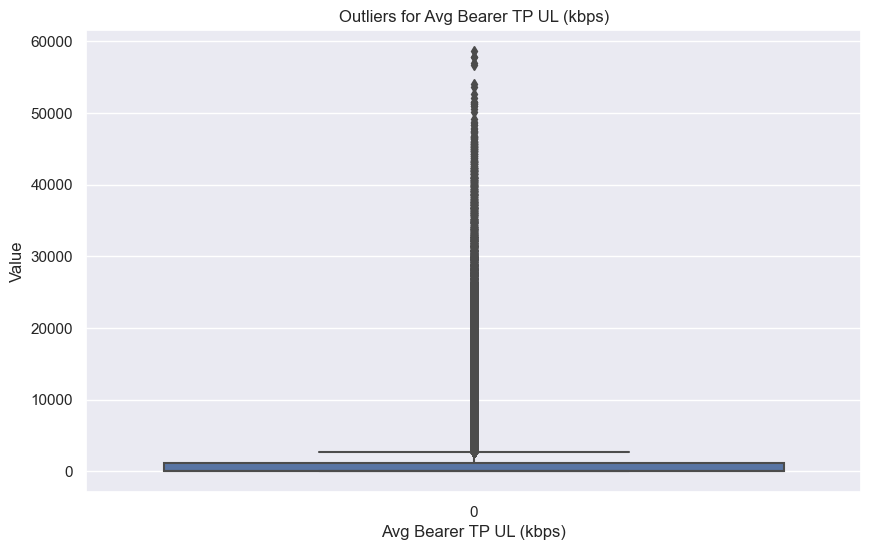

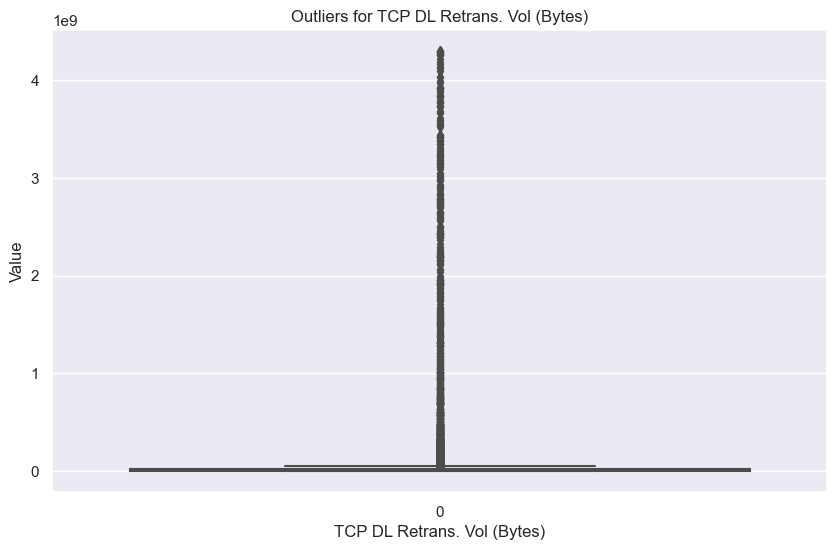

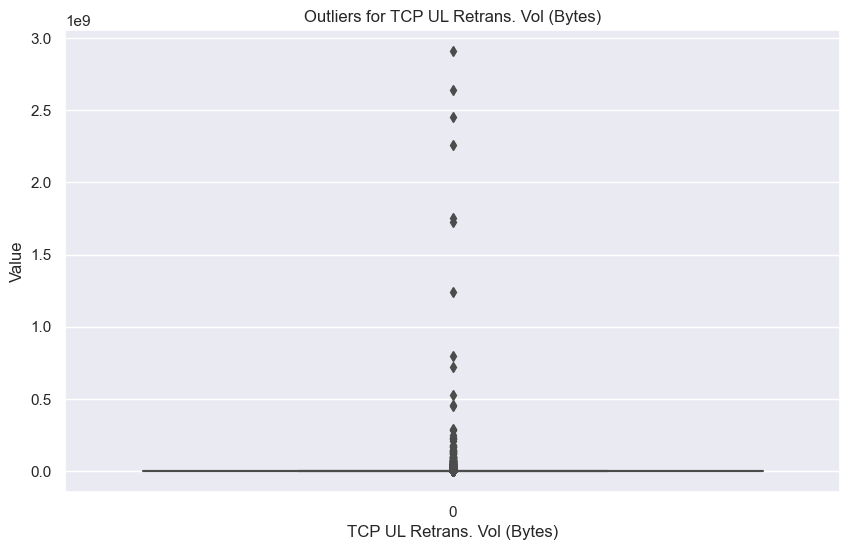

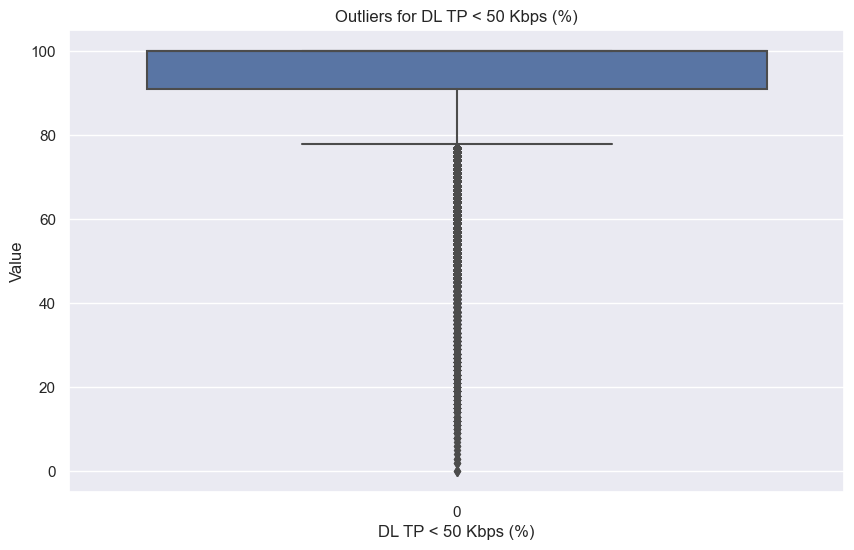

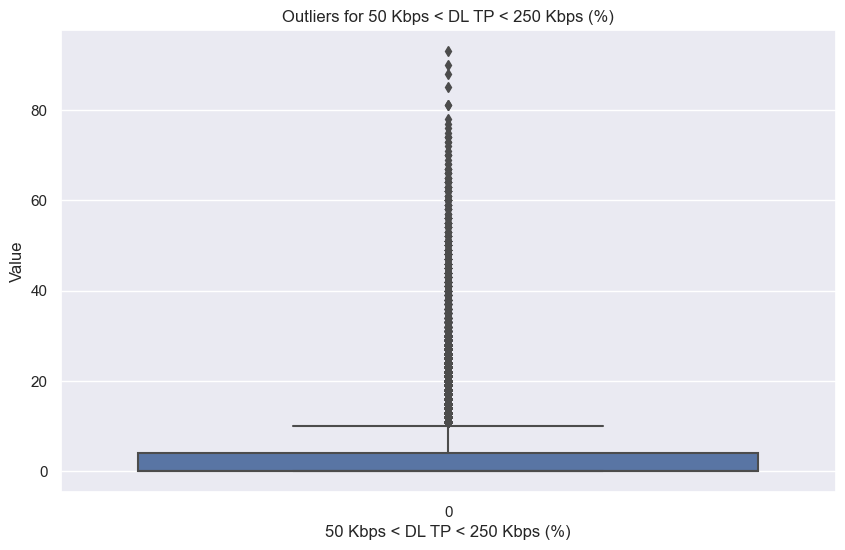

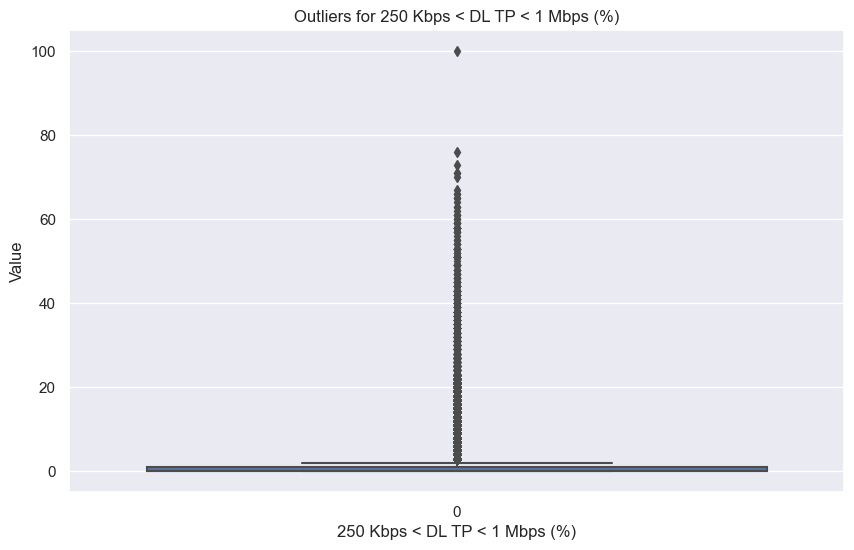

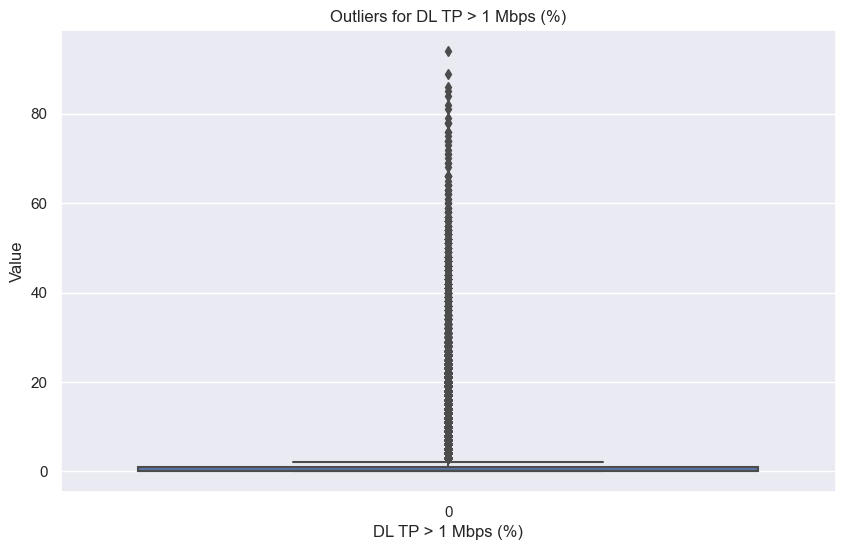

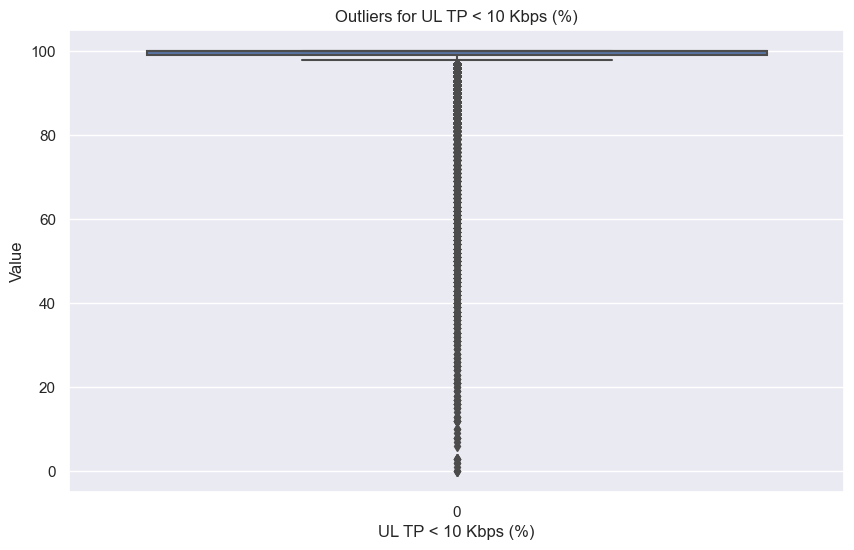

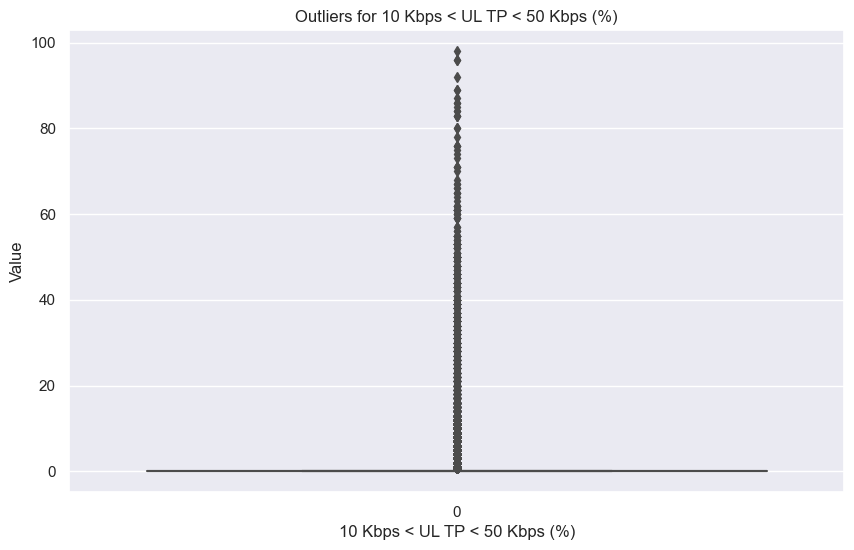

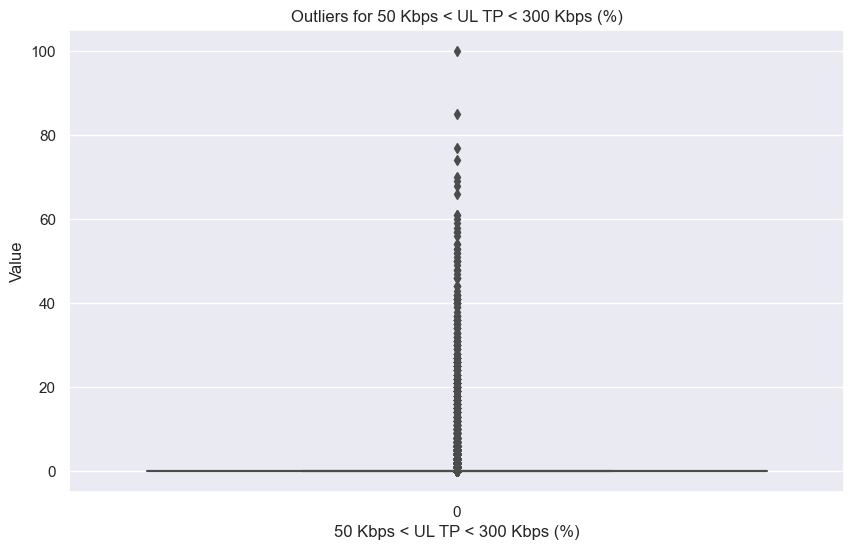

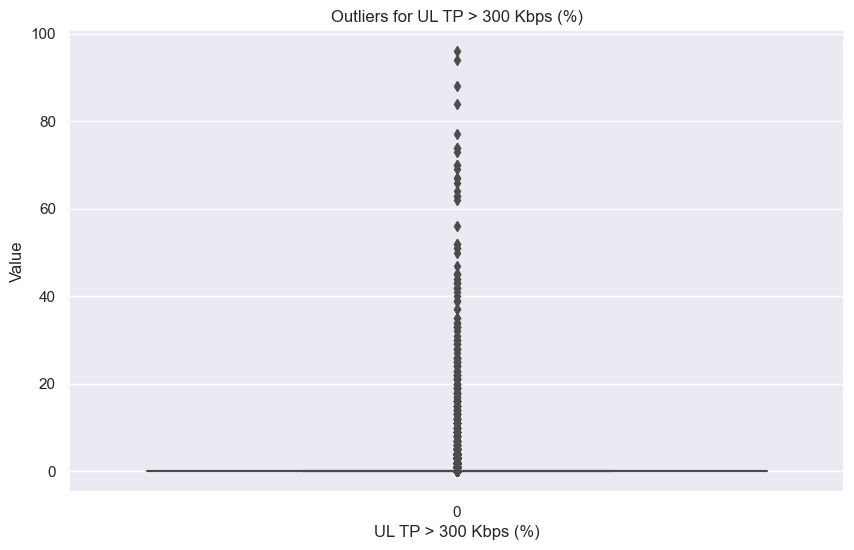

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the numeric columns in the dataset
numeric_columns = telcom_df.select_dtypes(include=[np.number]).columns

# Plotting outliers for each numeric variable
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(telcom_df[column])
    plt.title(f"Outliers for {column}")
    plt.xlabel(column)
    plt.ylabel("Value")
    plt.show()


<Axes: xlabel='DL TP > 1 Mbps (%)'>

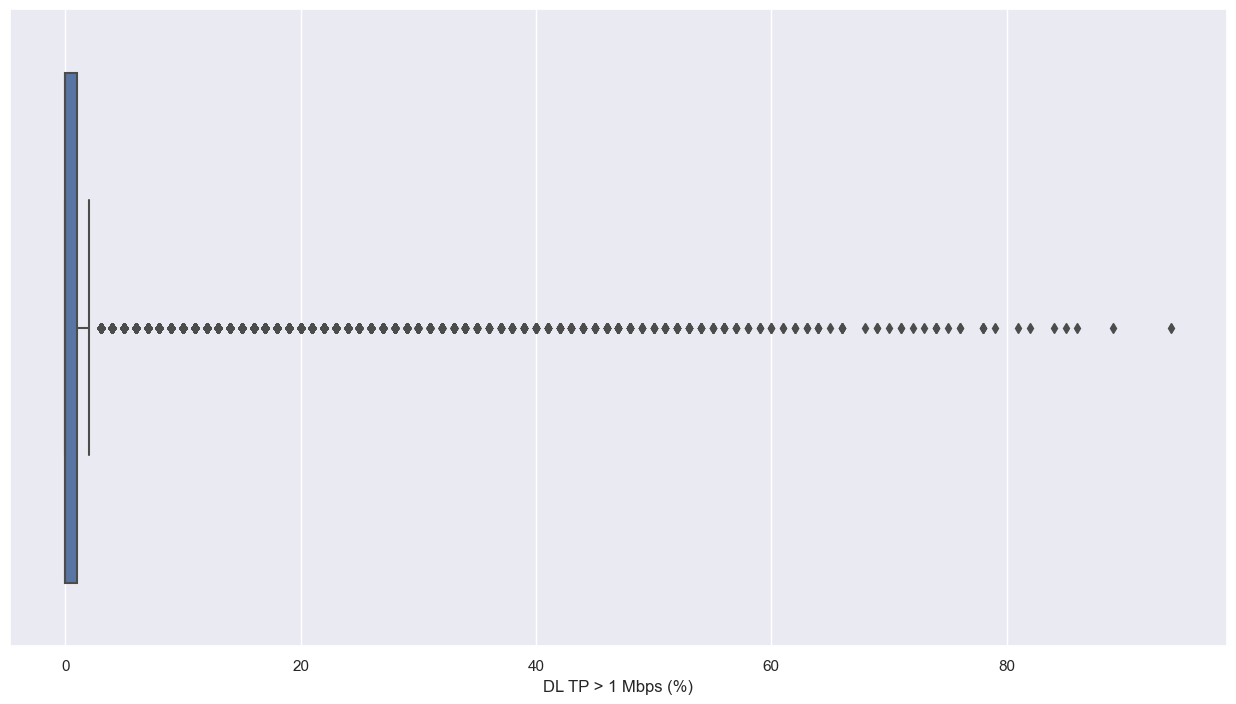

In [8]:
sns.boxplot(x=telcom_df['DL TP > 1 Mbps (%)'],data=telcom_df)

In [9]:
def outlier(df):
    column_name=['Avg RTT DL (ms)','Avg RTT UL (ms)','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
                'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
                '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)']
    
    for i in column_name:
        upper_quartile=df[i].quantile(0.75)
        lower_quartile=df[i].quantile(0.25)
        df[i]=np.where(df[i]>upper_quartile,df[i].mean(),np.where(df[i]<lower_quartile,df[i].mean(),df[i]))
    return df

In [10]:
experience_df = outlier(telcom_df)

#### Check for outliners

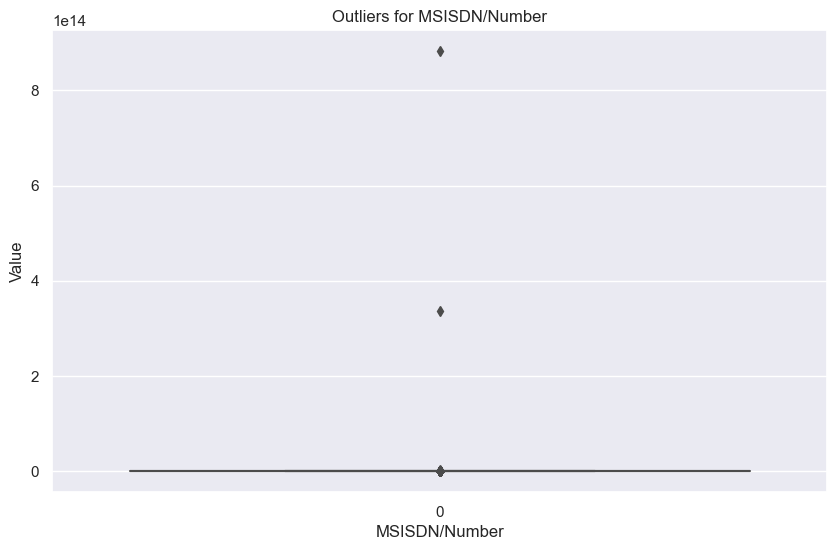

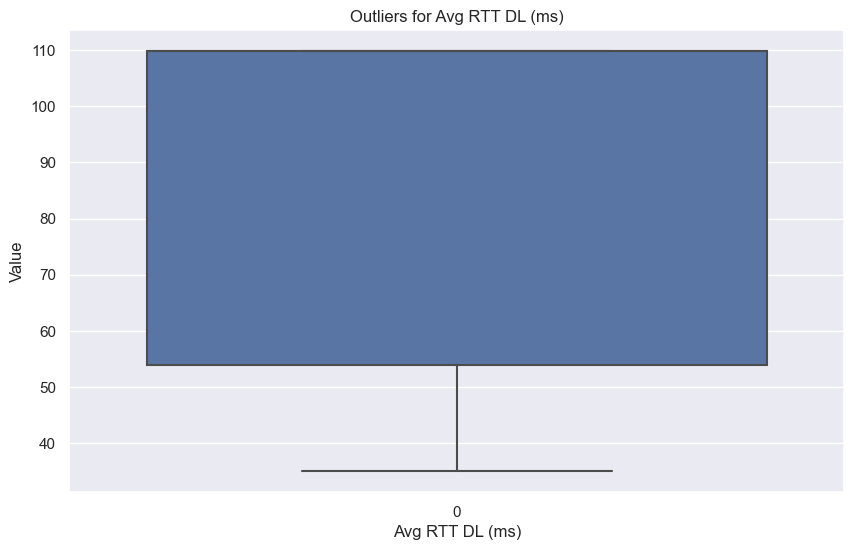

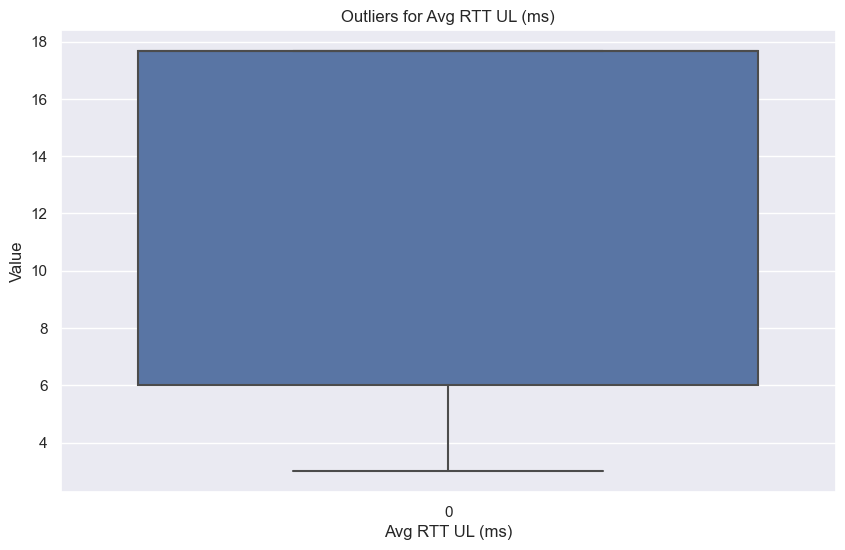

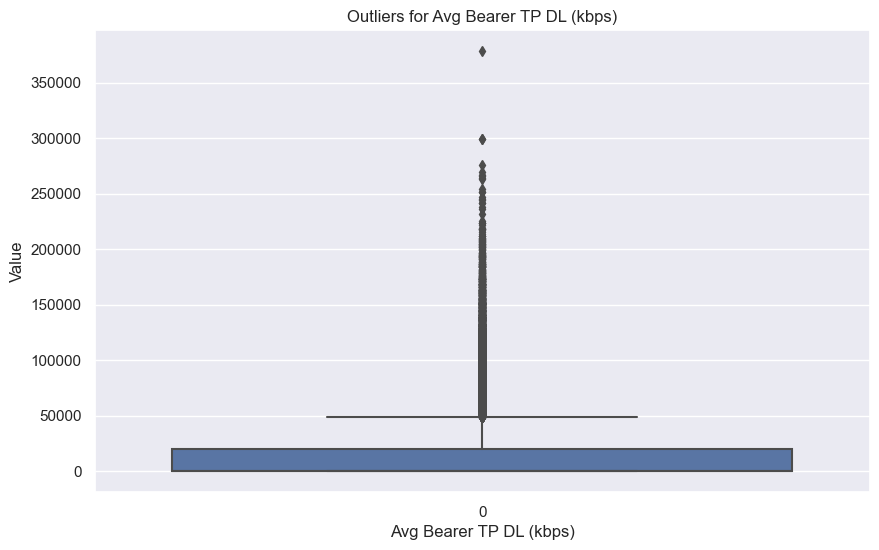

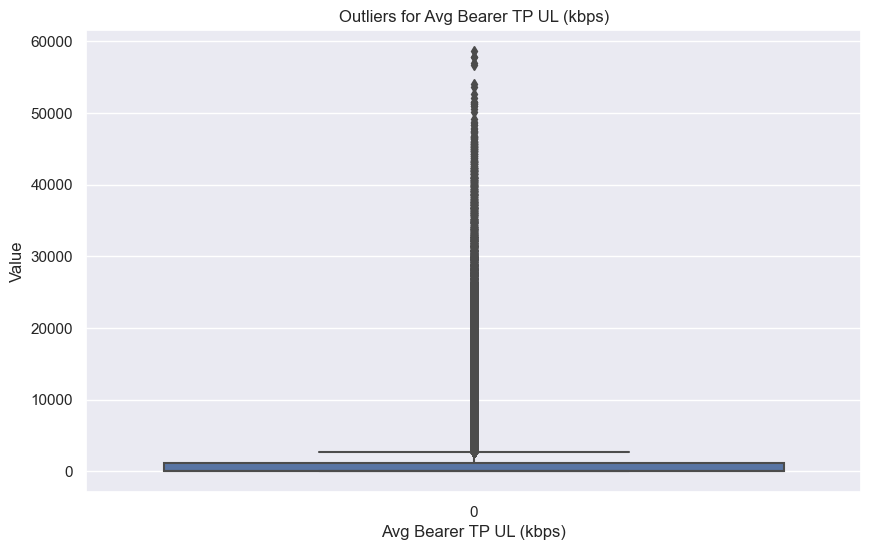

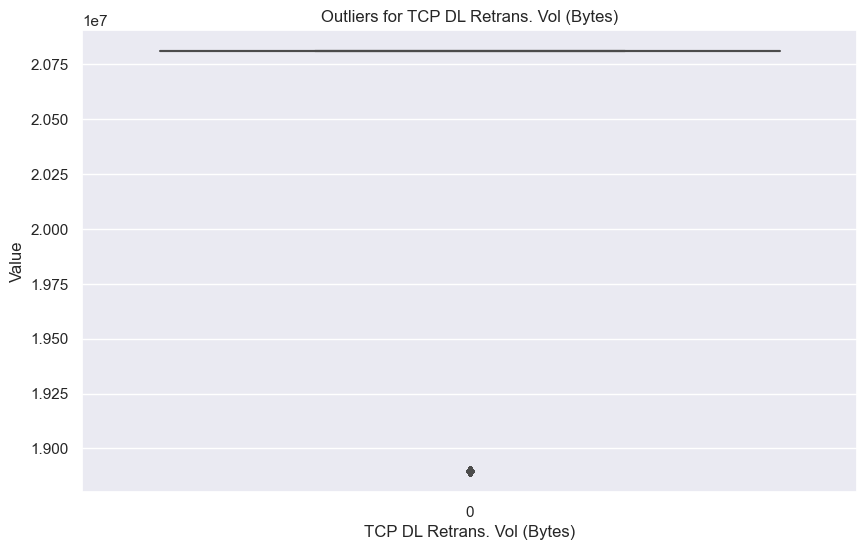

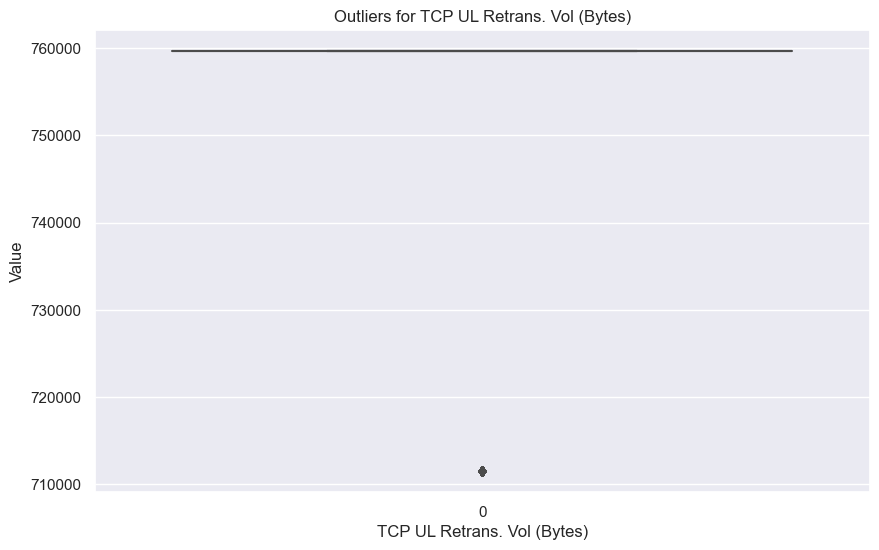

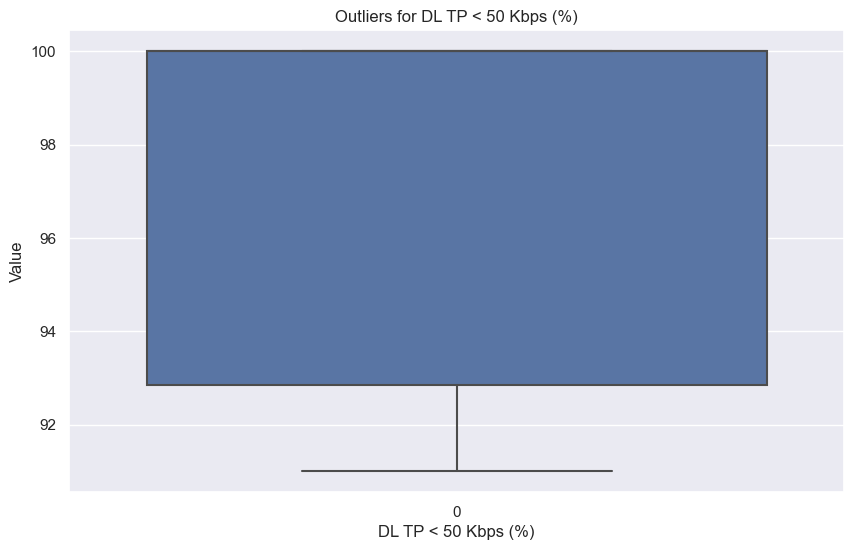

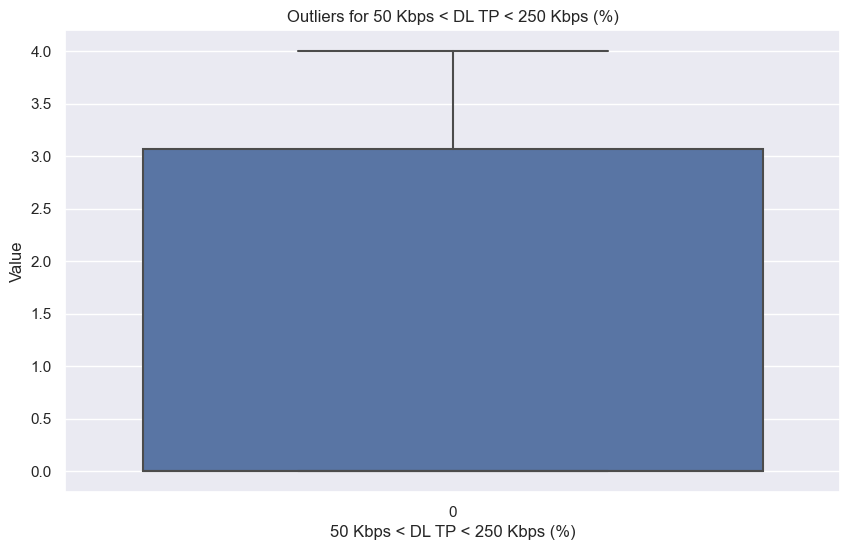

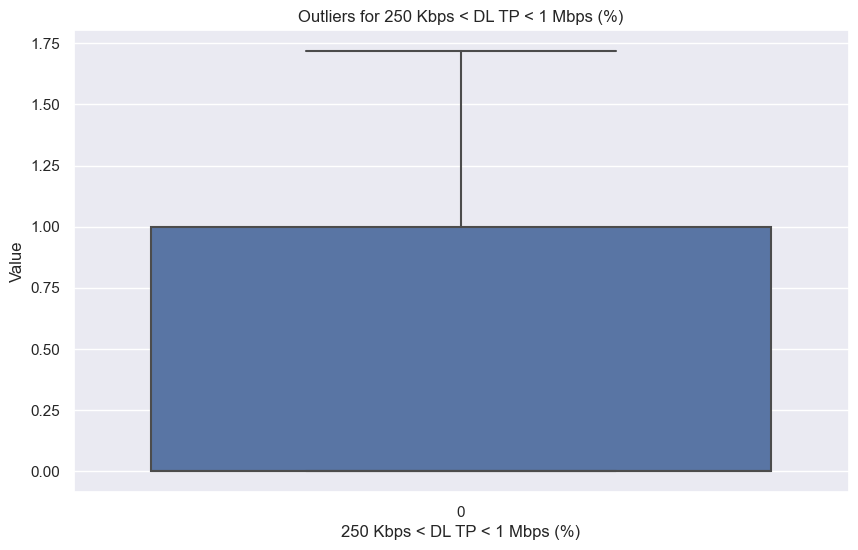

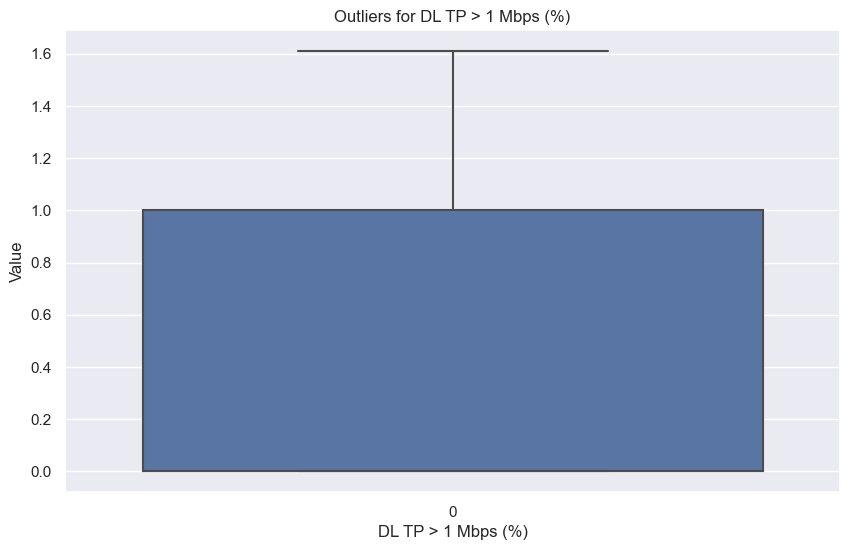

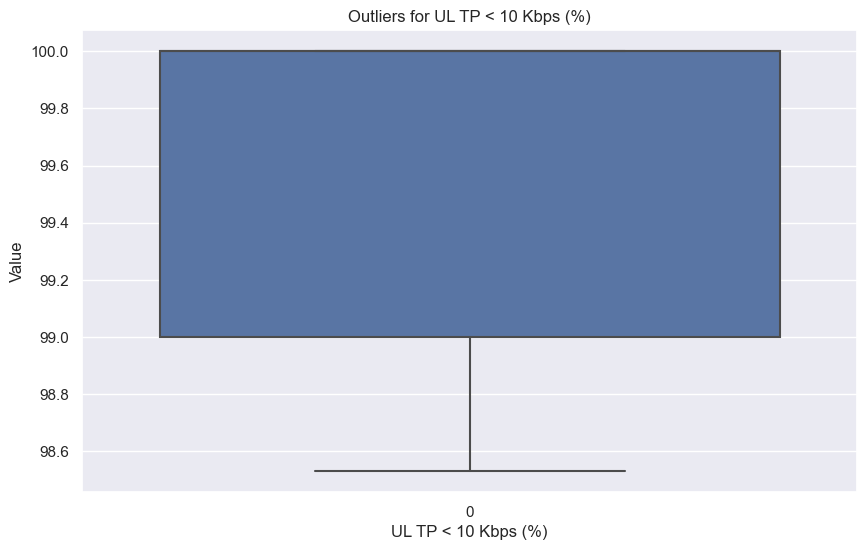

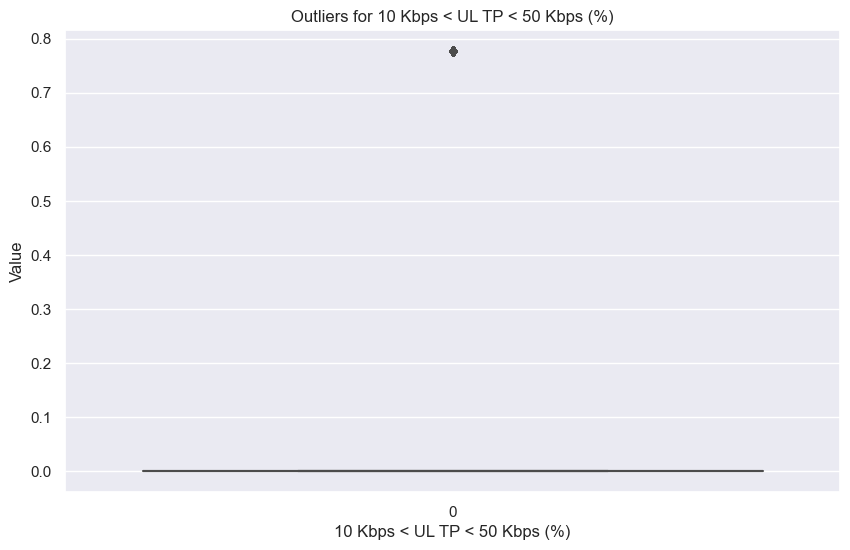

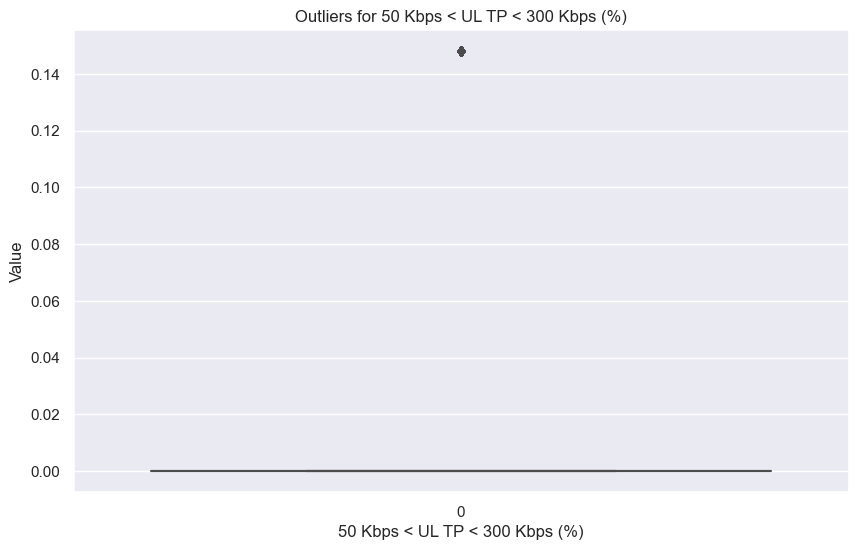

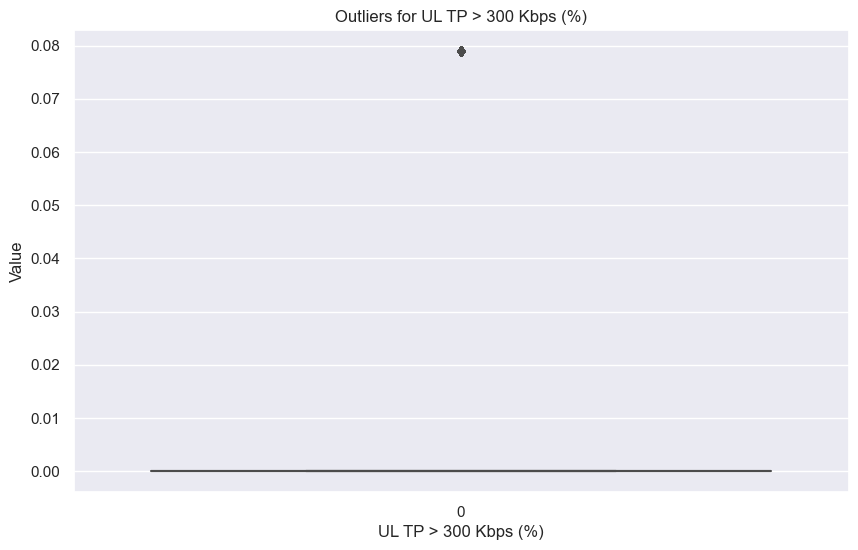

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the numeric columns in the dataset
numeric_columns = telcom_df.select_dtypes(include=[np.number]).columns

# Plotting outliers for each numeric variable
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(experience_df[column])
    plt.title(f"Outliers for {column}")
    plt.xlabel(column)
    plt.ylabel("Value")
    plt.show()


<Axes: xlabel='DL TP > 1 Mbps (%)'>

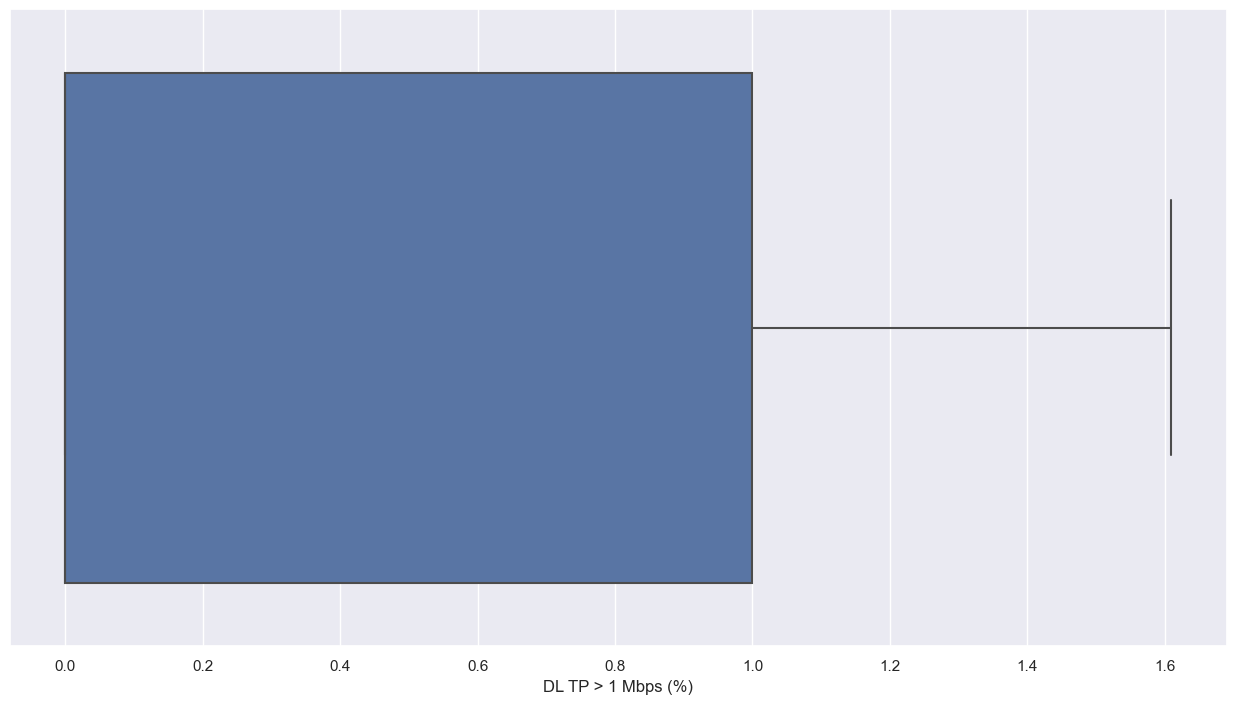

In [12]:
sns.boxplot(x=experience_df['DL TP > 1 Mbps (%)'],data=telcom_df)

***All the Outliers handled properly***

In [13]:
experience_df.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Handset Type
0,3.366496e+10,42.000000,5.000000,23.0,44.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A5 Sm-A520F
1,3.368185e+10,65.000000,5.000000,16.0,26.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy J5 (Sm-J530)
2,3.376063e+10,109.795706,17.662883,6.0,9.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Galaxy A8 (2018)
3,3.375034e+10,109.795706,17.662883,44.0,44.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,undefined
4,3.369980e+10,109.795706,17.662883,6.0,9.0,20809914.27,759658.6648,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,Samsung Sm-G390F


# Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable):

- Average TCP retransmission
- Average RTT
- Handset type
- Average throughput

In [14]:
telcom_user_experience = experience_df[[
    'MSISDN/Number',
    'Avg RTT DL (ms)',
    'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)',
    'TCP DL Retrans. Vol (Bytes)',
    'TCP UL Retrans. Vol (Bytes)',
    'Handset Type']]
telcom_user_experience.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type
0,3.366496e+10,42.000000,5.000000,23.0,44.0,20809914.27,759658.6648,Samsung Galaxy A5 Sm-A520F
1,3.368185e+10,65.000000,5.000000,16.0,26.0,20809914.27,759658.6648,Samsung Galaxy J5 (Sm-J530)
2,3.376063e+10,109.795706,17.662883,6.0,9.0,20809914.27,759658.6648,Samsung Galaxy A8 (2018)
3,3.375034e+10,109.795706,17.662883,44.0,44.0,20809914.27,759658.6648,undefined
4,3.369980e+10,109.795706,17.662883,6.0,9.0,20809914.27,759658.6648,Samsung Sm-G390F


In [15]:
## Caluclating the totals
telcom_user_experience['Total Avg RTT (ms)'] = telcom_user_experience['Avg RTT DL (ms)'] + telcom_user_experience['Avg RTT UL (ms)']/2
telcom_user_experience['Total Avg Bearer TP (kbps)'] = telcom_user_experience['Avg Bearer TP DL (kbps)'] + telcom_user_experience['Avg Bearer TP UL (kbps)']/2
telcom_user_experience['Total TCP Retrans. Vol (Bytes)'] = telcom_user_experience['TCP DL Retrans. Vol (Bytes)'] + telcom_user_experience['TCP UL Retrans. Vol (Bytes)']/2

In [16]:
telcom_user_experience['Total Avg RTT (ms)']

0          44.500000
1          67.500000
2         118.627148
3         118.627148
4         118.627148
             ...    
149996    118.627148
149997    118.627148
149998     46.000000
149999     39.500000
150000    118.627148
Name: Total Avg RTT (ms), Length: 150001, dtype: float64

In [17]:
telcom_user_experience['Total Avg Bearer TP (kbps)']

0            45.000000
1            29.000000
2            10.500000
3            66.000000
4            10.500000
              ...     
149996       84.500000
149997       50.000000
149998       66.500000
149999       52.500000
150000    14185.260254
Name: Total Avg Bearer TP (kbps), Length: 150001, dtype: float64

In [18]:
telcom_user_experience['Total TCP Retrans. Vol (Bytes)']

0         2.118974e+07
1         2.118974e+07
2         2.118974e+07
3         2.118974e+07
4         2.118974e+07
              ...     
149996    2.118974e+07
149997    2.118974e+07
149998    2.118974e+07
149999    2.118974e+07
150000    2.118974e+07
Name: Total TCP Retrans. Vol (Bytes), Length: 150001, dtype: float64

## Average TCP retransmission

In [19]:
# Calculate the average TCP retransmission per customer
avg_tcp_retransmission = telcom_user_experience.groupby('MSISDN/Number')[['Total TCP Retrans. Vol (Bytes)']].mean()

# Display the head of the average TCP retransmission dataframe
avg_tcp_retransmission.head().reset_index()

,MSISDN/Number,Total TCP Retrans. Vol (Bytes)
0,3.360100e+10,2.118974e+07
1,3.360100e+10,2.118974e+07
2,3.360100e+10,2.118974e+07
3,3.360101e+10,2.118974e+07
4,3.360101e+10,2.023285e+07


## Average RTT

In [20]:
# Calculate the average RTT per customer
avg_rtt = telcom_user_experience.groupby('MSISDN/Number')[['Total Avg RTT (ms)']].mean()

# Display the head of the average RTT dataframe
avg_rtt.head()

,Total Avg RTT (ms)
MSISDN/Number,
3.360100e+10,54.831441
3.360100e+10,118.627148
3.360100e+10,118.627148
3.360101e+10,76.500000
3.360101e+10,103.563574


## Handset type

In [21]:
# Aggregate the most common handset type per customer

# Group by customer and get the mode of the handset type
most_common_handset = telcom_user_experience.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode()[0])
most_common_handset_df = pd.DataFrame(most_common_handset).reset_index()
# Display the head of the most common handset dataframe
most_common_handset_df.head()

,MSISDN/Number,Handset Type
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,Apple iPhone 7 (A1778)
2,3.360100e+10,undefined
3,3.360101e+10,Apple iPhone 5S (A1457)
4,3.360101e+10,Apple iPhone Se (A1723)


## Average throughput

In [22]:
# Calculate the average throughput per customer
avg_throughput = telcom_user_experience.groupby('MSISDN/Number')[['Total Avg Bearer TP (kbps)']].mean()

# Display the head of the average throughput dataframe
avg_throughput.head().reset_index()

,MSISDN/Number,Total Avg Bearer TP (kbps)
0,3.360100e+10,56.50
1,3.360100e+10,73.50
2,3.360100e+10,72.50
3,3.360101e+10,226.00
4,3.360101e+10,24309.75


In [23]:
# Refactored code
telcom_user_experience_agg = telcom_user_experience.groupby('MSISDN/Number').agg({
    'Total TCP Retrans. Vol (Bytes)': 'sum',
    'Total Avg RTT (ms)': 'sum',
    'Total Avg Bearer TP (kbps)': 'sum',
    'Handset Type': lambda x: x.mode().iat[0]
})


In [24]:
telcom_user_experience_agg.head().reset_index()

,MSISDN/Number,Total TCP Retrans. Vol (Bytes),Total Avg RTT (ms),Total Avg Bearer TP (kbps),Handset Type
0,3.360100e+10,2.118974e+07,54.831441,56.5,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,2.118974e+07,118.627148,73.5,Apple iPhone 7 (A1778)
2,3.360100e+10,2.118974e+07,118.627148,72.5,undefined
3,3.360101e+10,2.118974e+07,76.500000,226.0,Apple iPhone 5S (A1457)
4,3.360101e+10,4.046570e+07,207.127148,48619.5,Apple iPhone Se (A1723)


# Task 3.2 - Compute & list 10 of the top, bottom and most frequent:

## a. TCP values in the dataset. 

In [25]:
# Compute the top 10 TCP values
top_tcp_values = telcom_user_experience_agg['Total TCP Retrans. Vol (Bytes)'].value_counts().head(10)
# Print the results
print("Top 10 TCP values:")
top_tcp_values

Top 10 TCP values:


Total TCP Retrans. Vol (Bytes)
2.118974e+07    47125
2.118974e+07    12739
4.237949e+07     7468
2.118974e+07     5744
4.237949e+07     4687
1.927595e+07     4604
1.925188e+07     3096
2.116567e+07     2394
4.237949e+07     2202
2.118974e+07     1692
Name: count, dtype: int64

In [26]:
# Compute the bottom 10 TCP values
bottom_tcp_values = telcom_user_experience_agg['Total TCP Retrans. Vol (Bytes)'].value_counts().tail(10)

print("\nBottom 10 TCP values:")
bottom_tcp_values


Bottom 10 TCP values:


Total TCP Retrans. Vol (Bytes)
2.118974e+08    1
1.425628e+08    1
1.040109e+08    1
1.021211e+08    1
1.193629e+08    1
1.271385e+08    1
1.040109e+08    1
1.406730e+08    1
1.251765e+08    1
2.542769e+08    1
Name: count, dtype: int64

In [27]:
# Compute the most frequent TCP values
most_frequent_tcp_values = telcom_user_experience_agg['Total TCP Retrans. Vol (Bytes)'].value_counts().idxmax()

print("\nMost frequent TCP value:")
most_frequent_tcp_values


Most frequent TCP value:


21189743.6024

## b. RTT values in the dataset.


In [28]:
# Compute the top 10 TCP values
top_rtt_values = telcom_user_experience_agg['Total Avg RTT (ms)'].value_counts().head(10)
# Print the results
print("Top 10 RTT values:")
top_rtt_values

Top 10 RTT values:


Total Avg RTT (ms)
118.627148    16353
118.627148    14775
112.295706     2984
111.295706     2212
111.795706     2155
237.254295     1908
112.795706     1726
237.254295     1330
113.295706     1037
46.831441       828
Name: count, dtype: int64

In [29]:
# Compute the bottom 10 TCP values
bottom_tcp_values = telcom_user_experience_agg['Total Avg RTT (ms)'].value_counts().tail(10)

print("\nBottom 10 TCP values:")
bottom_tcp_values


Bottom 10 TCP values:


Total Avg RTT (ms)
257.162883    1
571.340032    1
355.325766    1
329.254295    1
679.002915    1
356.325766    1
322.085736    1
232.325766    1
388.994324    1
400.881443    1
Name: count, dtype: int64

In [30]:
# Compute the most frequent TCP values
most_frequent_rtt_values = telcom_user_experience_agg['Total Avg RTT (ms)'].value_counts().idxmax()

print("\nMost frequent RTT value:")
most_frequent_rtt_values


Most frequent RTT value:


118.62714755500001

### c. Throughput values in the dataset.


In [31]:
# Compute the top 10 TCP values
top_tp_values = telcom_user_experience_agg['Total Avg Bearer TP (kbps)'].value_counts().head(10)
# Print the results
print("Top 10 TP values:")
top_tp_values

Top 10 TP values:


Total Avg Bearer TP (kbps)
10.5    2684
43.0    1909
66.5     795
67.5     670
86.0     621
70.5     597
70.0     587
68.0     583
71.0     572
45.0     563
Name: count, dtype: int64

In [32]:
# Compute the bottom 10 TCP values
bottom_tp_values = telcom_user_experience_agg['Total Avg Bearer TP (kbps)'].value_counts().tail(10)

print("\nBottom 10 TP values:")
bottom_tp_values


Bottom 10 TP values:


Total Avg Bearer TP (kbps)
21977.5     1
6099.0      1
19316.5     1
264669.5    1
195614.5    1
21353.5     1
15120.5     1
58540.0     1
49872.5     1
10171.5     1
Name: count, dtype: int64

In [33]:
# Compute the most frequent TCP values
most_frequent_tp_values = telcom_user_experience_agg['Total Avg Bearer TP (kbps)'].value_counts().idxmax()

print("\nMost frequent TP value:")
most_frequent_tp_values


Most frequent TP value:


10.5

## Task 3.3 - Compute & report:
    d.	The distribution of the average throughput  per handset type and provide interpretation for your findings.
    e.	The average TCP retransmission view per handset type and provide interpretation for your findings.



In [34]:
handset_type_df = telcom_user_experience_agg.groupby('Handset Type').agg(
    {'Total Avg Bearer TP (kbps)': 'mean', 'Total TCP Retrans. Vol (Bytes)': 'mean'})
handset_type_df.head()

,Total Avg Bearer TP (kbps),Total TCP Retrans. Vol (Bytes)
Handset Type,,
A-Link Telecom I. Cubot A5,23347.0,2.118974e+07
A-Link Telecom I. Cubot Note Plus,6613.0,2.118974e+07
A-Link Telecom I. Cubot Note S,8726.0,2.116567e+07
A-Link Telecom I. Cubot Nova,55942.0,2.118974e+07
A-Link Telecom I. Cubot Power,69297.0,2.118974e+07


#### Distribution Of The Average Throughput Per Handset Type.

In [35]:
sorted_by_tp = handset_type_df.sort_values(
    'Total Avg Bearer TP (kbps)', ascending=False)

top_tp = sorted_by_tp['Total Avg Bearer TP (kbps)']

In [36]:
top_tp.head().reset_index()

,Handset Type,Total Avg Bearer TP (kbps)
0,Spa Condor Elect. Allure M2,167606.00
1,Huawei Par-Lx9,141753.50
2,Huawei B715S-23C,130695.45
3,Asustek Wireless-Ac1200 Lte Router,109264.75
4,New-Bund Technol. Thor,105239.75


#### Average TCP Retransmission View Per Handset Type.

In [37]:
sorted_by_tcp = handset_type_df.sort_values(
    'Total TCP Retrans. Vol (Bytes)', ascending=False)

top_tcp = sorted_by_tcp['Total TCP Retrans. Vol (Bytes)']

In [38]:
top_tcp.head().reset_index()

,Handset Type,Total TCP Retrans. Vol (Bytes)
0,Huawei Me909S-120,7.416410e+07
1,Huawei B618S-22D,6.739468e+07
2,D-Link Corporati. D-Link Lte Usb Adaptor,6.356923e+07
3,Huawei Evr-Al00,6.356923e+07
4,Apple iPhone Xr (A2106),6.356923e+07


### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster.

In [39]:
telcom_user_experience_agg.head()

,Total TCP Retrans. Vol (Bytes),Total Avg RTT (ms),Total Avg Bearer TP (kbps),Handset Type
MSISDN/Number,,,,
3.360100e+10,2.118974e+07,54.831441,56.5,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,2.118974e+07,118.627148,73.5,Apple iPhone 7 (A1778)
3.360100e+10,2.118974e+07,118.627148,72.5,undefined
3.360101e+10,2.118974e+07,76.500000,226.0,Apple iPhone 5S (A1457)
3.360101e+10,4.046570e+07,207.127148,48619.5,Apple iPhone Se (A1723)


In [47]:
telcom_user_experience_agg_new = pd.DataFrame(columns=[
    "Total TCP Retrans. Vol (Bytes)",
    "Total Avg RTT (ms)",
    "Total Avg Bearer TP (kbps)",
])

telcom_user_experience_agg_new["Total TCP Retrans. Vol (Bytes)"] = telcom_user_experience_agg["Total TCP Retrans. Vol (Bytes)"]
telcom_user_experience_agg_new["Total Avg RTT (ms)"] = telcom_user_experience_agg["Total Avg RTT (ms)"].sum()
telcom_user_experience_agg_new["Total Avg Bearer TP (kbps)"] = telcom_user_experience_agg["Total Avg Bearer TP (kbps)"]
#telcom_user_experience_agg_new["Handset Type"] = telcom_user_experience_agg["Handset Type"]
telcom_user_experience_agg_new.head()#.reset_index()


,Total TCP Retrans. Vol (Bytes),Total Avg RTT (ms),Total Avg Bearer TP (kbps)
MSISDN/Number,,,
3.360100e+10,2.118974e+07,1.374283e+07,56.5
3.360100e+10,2.118974e+07,1.374283e+07,73.5
3.360100e+10,2.118974e+07,1.374283e+07,72.5
3.360101e+10,2.118974e+07,1.374283e+07,226.0
3.360101e+10,4.046570e+07,1.374283e+07,48619.5


<Axes: >

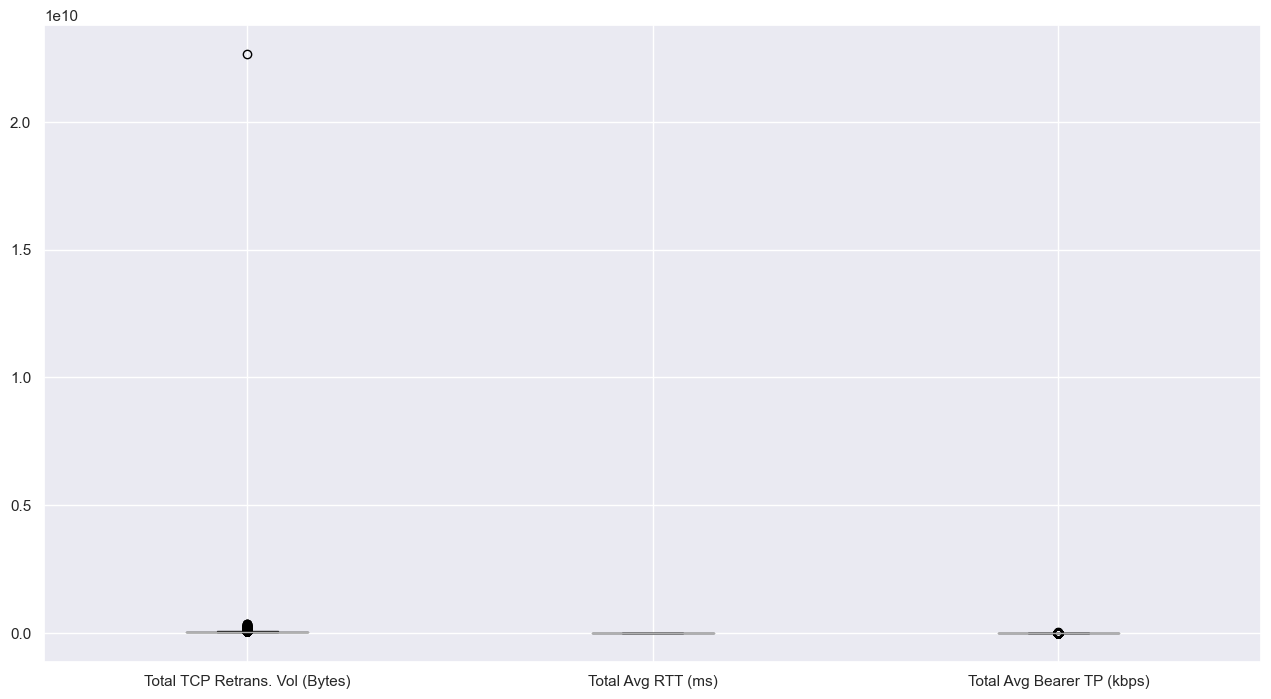

In [48]:
telcom_user_experience_agg_new.boxplot()

#### KMeans Clustering

#### Scaling Data

In [49]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans

In [50]:
scaler_instance = StandardScaler()
scaled_data = scaler_instance.fit_transform(telcom_user_experience_agg_new)
scaled_data

array([[-0.11522399,  0.        , -0.30008388],
       [-0.11522399,  0.        , -0.29982697],
       [-0.11522399,  0.        , -0.29984208],
       ...,
       [-0.11522399,  0.        , -0.30092264],
       [-0.11522399,  0.        , -0.30060527],
       [-0.11522399,  0.        , -0.30090753]])

#### Normalize Data

In [51]:
normalized_data = normalize(scaled_data)
normalized_data

array([[-0.35845629,  0.        , -0.93354651],
       [-0.35872394,  0.        , -0.9334437 ],
       [-0.35870818,  0.        , -0.93344975],
       ...,
       [-0.35758508,  0.        , -0.93388057],
       [-0.35791427,  0.        , -0.93375445],
       [-0.35760074,  0.        , -0.93387457]])

In [52]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(normalized_data)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
telcom_user_experience_agg_new.insert(0, 'cluster', kmeans.labels_)
telcom_user_experience_agg_new

,cluster,Total TCP Retrans. Vol (Bytes),Total Avg RTT (ms),Total Avg Bearer TP (kbps)
MSISDN/Number,,,,
3.360100e+10,0,2.118974e+07,1.374283e+07,56.5
3.360100e+10,0,2.118974e+07,1.374283e+07,73.5
3.360100e+10,0,2.118974e+07,1.374283e+07,72.5
3.360101e+10,0,2.118974e+07,1.374283e+07,226.0
3.360101e+10,1,4.046570e+07,1.374283e+07,48619.5
...,...,...,...,...
3.379000e+10,0,2.118974e+07,1.374283e+07,10171.5
3.379000e+10,0,2.118974e+07,1.374283e+07,92.0
3.200000e+12,0,2.118974e+07,1.374283e+07,1.0


In [55]:
telcom_user_experience_agg_new['cluster'].value_counts()

cluster
0    63158
1    27906
2    15792
Name: count, dtype: int64

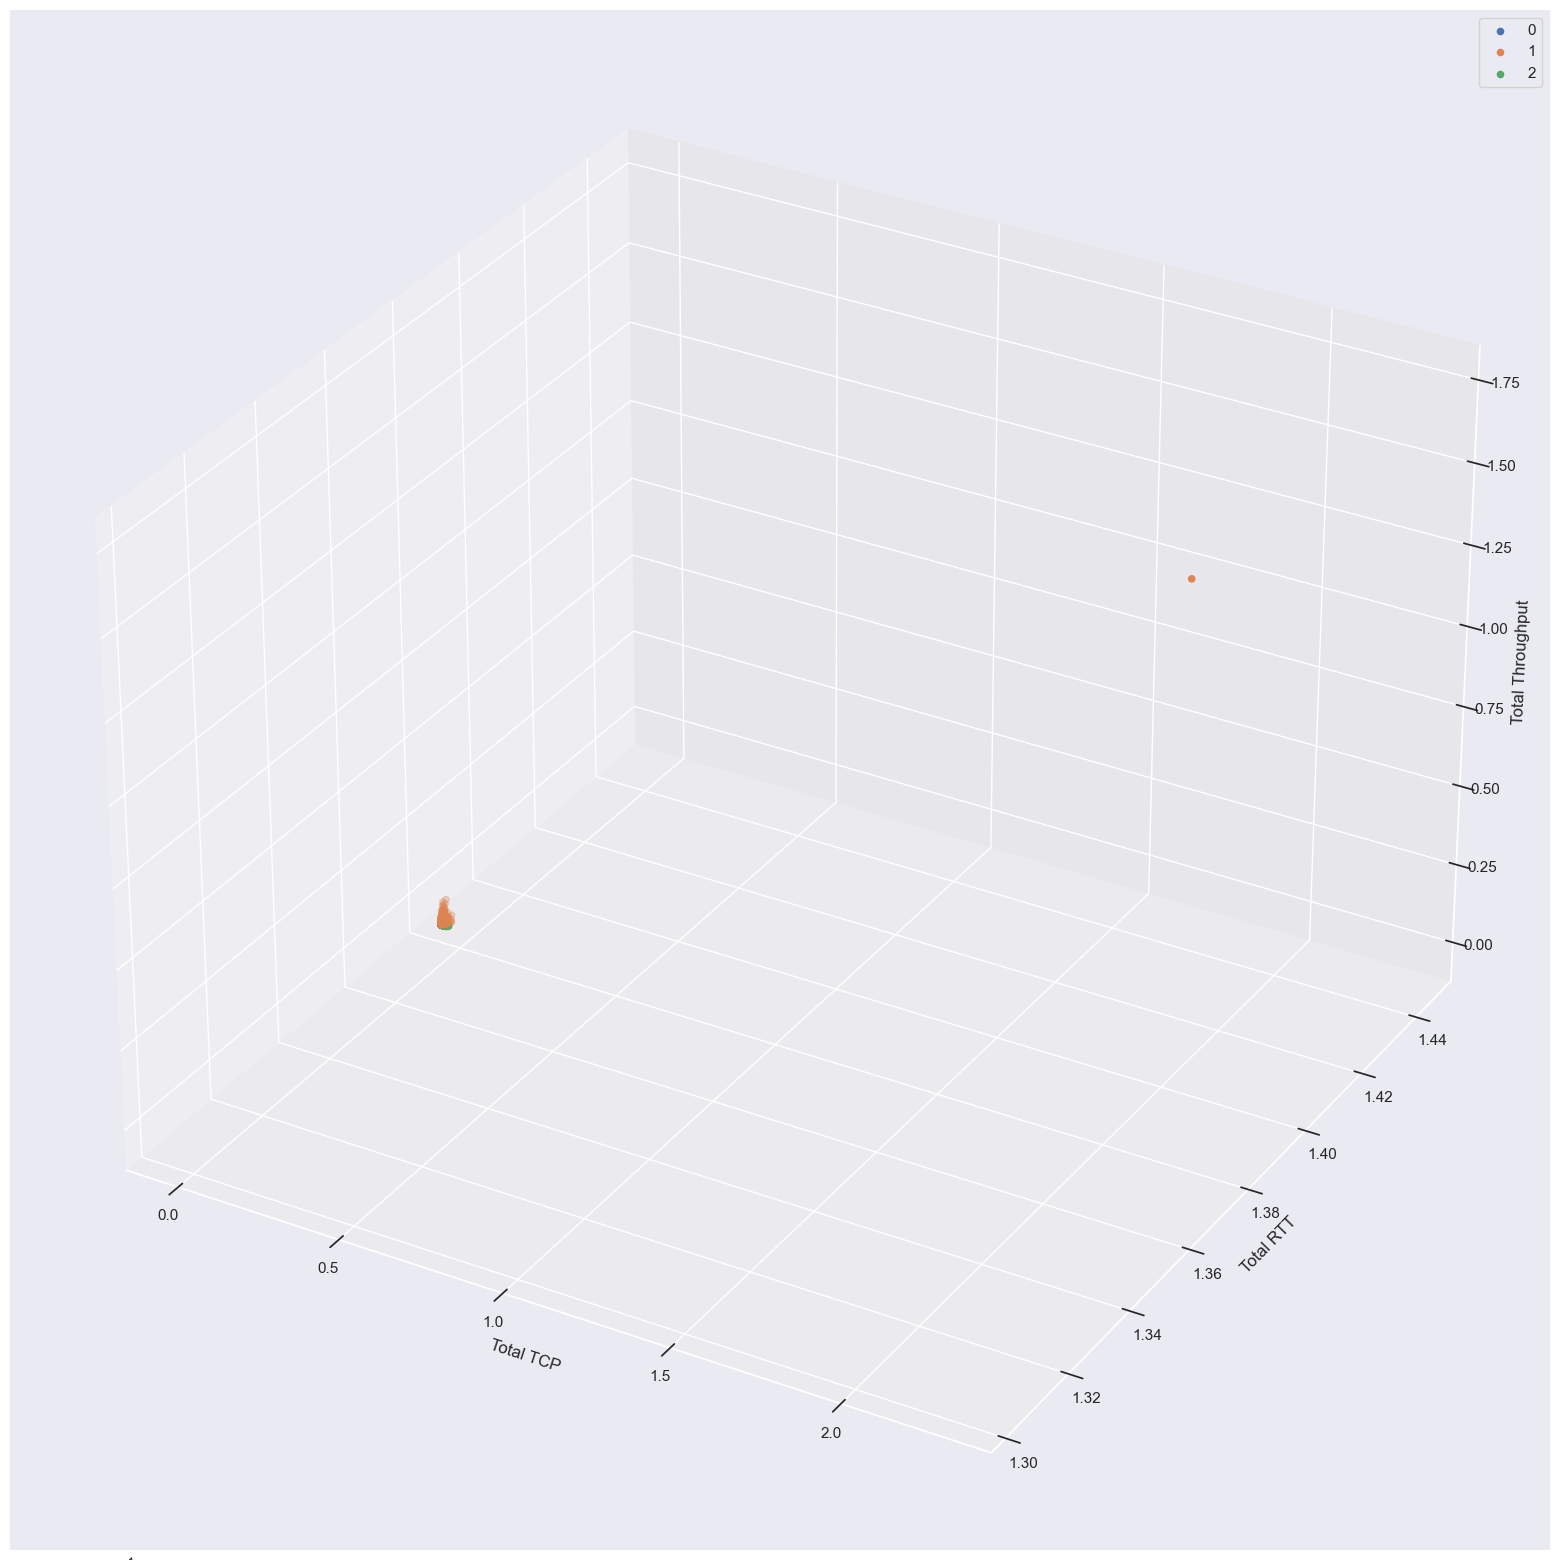

In [67]:
from matplotlib import cm
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
for s in telcom_user_experience_agg_new.cluster.unique():
    ax.scatter(telcom_user_experience_agg_new['Total TCP Retrans. Vol (Bytes)'][telcom_user_experience_agg_new.cluster == s],
               telcom_user_experience_agg_new['Total Avg RTT (ms)'][telcom_user_experience_agg_new.cluster == s],
               telcom_user_experience_agg_new['Total Avg Bearer TP (kbps)'][telcom_user_experience_agg_new.cluster == s],
               label=s)
    ax.set_xlabel('Total TCP')
    ax.set_ylabel('Total RTT')
    ax.set_zlabel('Total Throughput')
    ax.legend()


In [60]:
cluster0 = telcom_user_experience_agg_new[telcom_user_experience_agg_new["cluster"]==0]
cluster0[["Total Avg RTT (ms)",
    "Total Avg Bearer TP (kbps)",
    "Total TCP Retrans. Vol (Bytes)"]].describe()
#Statistical information for cluster0

,Total Avg RTT (ms),Total Avg Bearer TP (kbps),Total TCP Retrans. Vol (Bytes)
count,6.315800e+04,63158.000000,6.315800e+04
mean,1.374283e+07,1979.167097,2.110935e+07
std,1.099342e-05,4595.349365,3.841008e+05
min,1.374283e+07,0.000000,1.925188e+07
25%,1.374283e+07,58.000000,2.118974e+07
50%,1.374283e+07,77.000000,2.118974e+07
75%,1.374283e+07,404.000000,2.118974e+07
max,1.374283e+07,21377.500000,2.118974e+07


In [61]:
cluster1 = telcom_user_experience_agg_new[telcom_user_experience_agg_new["cluster"]==1]
cluster1[["Total Avg RTT (ms)",
    "Total Avg Bearer TP (kbps)",
    "Total TCP Retrans. Vol (Bytes)"]].describe()
#Statistical information for cluster1

,Total Avg RTT (ms),Total Avg Bearer TP (kbps),Total TCP Retrans. Vol (Bytes)
count,2.790600e+04,2.790600e+04,2.790600e+04
mean,1.374283e+07,6.868479e+04,3.747000e+07
std,1.655921e-06,1.159763e+05,1.374319e+08
min,1.374283e+07,2.110550e+04,1.925188e+07
25%,1.374283e+07,3.516662e+04,2.118974e+07
50%,1.374283e+07,5.137825e+04,2.118974e+07
75%,1.374283e+07,8.009188e+04,4.237949e+07
max,1.374283e+07,1.727683e+07,2.266657e+10


In [62]:
cluster2 = telcom_user_experience_agg_new[telcom_user_experience_agg_new["cluster"]==2]
cluster2[["Total Avg RTT (ms)",
    "Total Avg Bearer TP (kbps)",
    "Total TCP Retrans. Vol (Bytes)"]].describe()
#Statistical information for cluster2

,Total Avg RTT (ms),Total Avg Bearer TP (kbps),Total TCP Retrans. Vol (Bytes)
count,1.579200e+04,15792.000000,1.579200e+04
mean,1.374283e+07,5451.189653,4.828198e+07
std,3.043659e-06,8676.001380,1.464814e+07
min,1.374283e+07,0.000000,3.850376e+07
25%,1.374283e+07,140.500000,4.237949e+07
50%,1.374283e+07,331.000000,4.237949e+07
75%,1.374283e+07,8427.250000,4.237949e+07
max,1.374283e+07,79360.500000,2.542769e+08


In [63]:
telcom_user_experience_agg_new.to_csv('telcom_user_experience_data.csv')